# Idea
계좌의 미래를 예상해야 한다.  
손실 날 때 패턴을 파악해야 한다.  
계좌가 파국으로 가기 전, 파국 시그널을 포착해야 한다.  

# Concept
첫 매매에서 손실이 나면 하루 손익은 어떻게 되는지 확인한다.  
수익인가? 손실인가?  

# Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [2]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,특징주,SEN,강세 토픽
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,NaN,NaN,NaN
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,NaN,NaN,NaN
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,NaN,NaN,NaN
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,NaN,NaN,NaN
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,NaN,NaN,NaN


# Preprocessing

In [4]:
dates = df['주문일자'].unique()
dates

array(['2022-03-29', '2022-03-31', '2022-03-30', '2022-04-04',
       '2022-04-01', '2022-04-06', '2022-04-05', '2022-04-07'],
      dtype=object)

In [17]:
X = []
y = []
for date in dates:
    frame = df[df['주문일자'] == date].reset_index(drop=True)
    first = frame.iloc[0]['수익률']
    total = round(frame['수익률'].mean(),2)
    X.append(first)
    y.append(total)

In [22]:
X, y

([2.87, -2.26, 2.39, -1.7, -0.21, -1.96, -0.51, 4.95],
 [1.57, 0.82, 0.24, -0.84, -0.22, 0.55, 0.86, 4.95])

# Visualization
총 8거래일 중 6일 수익, 2일 손실을 봤다.  
  
첫 매매에서 수익을 본 경우는 3번    
첫 매매에서 손실을 본 경우는 5번  
따라서 첫 매매 승률(37.5%)이 높지 않다.  
그러므로 첫 매매 승률을 끌어올려야 한다.  

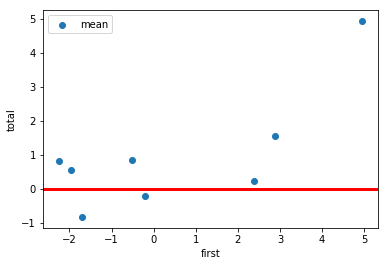

In [39]:
plt.scatter(X, y)
plt.xlabel('first')
plt.ylabel('total')
plt.legend(['mean'])
plt.axhline(y=0, color='r', linewidth=3)
plt.show()

# Linear Regression
우상향하는 직선이므로 양의 상관관계가 있는 것으로 보인다.  
따라서,   
첫 매매에서 손실이면 하루 매매도 손실이고  
첫 매매에서 수익이면 하루 매매도 수익이다.

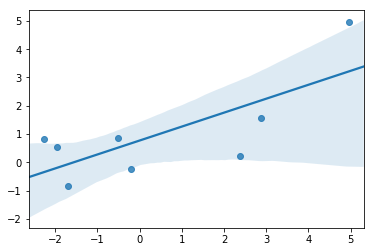

In [41]:
sns.regplot(x=X, y=y)

# Conclusion
첫 매매손익이 하루 매매손익을 결정한다.  
첫 매매승률은 37.5%로 낮은 편이다.  
그러므로 첫 매매승률을 높여야 한다.    
  
방법은 두 가지다.  
1. 현재 사용하는 첫 매매 방법은 제외한다. (승률 37.5%)  
2. 승률 높은 매매 방법으로 첫 매매를 시도한다.